# Binary oversampling

This notebook presents the general usecase of the ```smote_variants``` package, namely, the oversampling of binary classification datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
import imbalanced_databases as imbd

from sklearn.datasets import make_classification

import logging
logging.getLogger('smote_variants').setLevel(logging.CRITICAL)

## Illustrating the imbalanced nature

The imbalanced nature of the ```iris0``` dataset is illustrated by plotting the first two coordinates, the colors of the scatter plot indicating the minority ('olive') and majority ('orange') classes.

In [2]:
X, y= make_classification(n_samples=100, 
                            n_features=3,
                            n_informative=2,
                            n_redundant=1,
                            n_repeated=0,
                            n_clusters_per_class=2,
                            weights=np.array([0.8, 0.2]),
                            random_state=7)

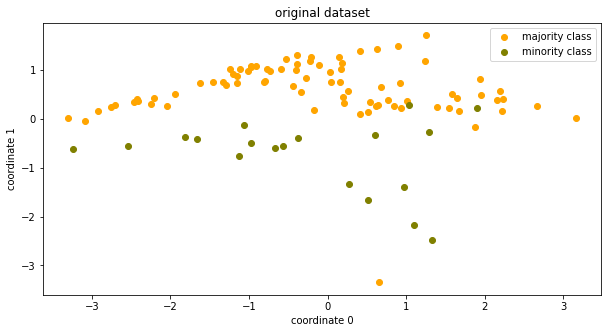

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='majority class', c='orange')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='minority class', c='olive')
plt.title('original dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.legend()

In [4]:
# printing the number of samples

print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))

majority class: 81
minority class: 19


## Oversampling

The oversampling is carried out by instantiating any oversampler implemented in the package and calling the ```sample``` function.

In [5]:
oversampler= sv.distance_SMOTE()
X_samp, y_samp= oversampler.sample(X, y)

## Illustrating the oversampled dataset

The oversampled dataset is illustrated by printing the number of samples after oversampling. The newly generated samples can be filtered by removing the first ```len(X)``` elements of the oversampled dataset. Note that this filtering works only with *extensive* techniques, namely, with oversamplers which only add samples to the dataset. There are multiple oversamplers which also remove noisy samples, with these oversamplers there is no way to filter newly generated samples.

In [6]:
# printing the number of samples
print('majority class: %d' % np.sum(y_samp == 0))
print('minority class: %d' % np.sum(y_samp == 1))

majority class: 81
minority class: 81


In [7]:
# filtering new samples
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

In [8]:
# printing the number of new samples
print('majority new samples: %d' % np.sum(y_samp == 0))
print('minority new samples: %d' % np.sum(y_samp == 1))

majority new samples: 0
minority new samples: 62


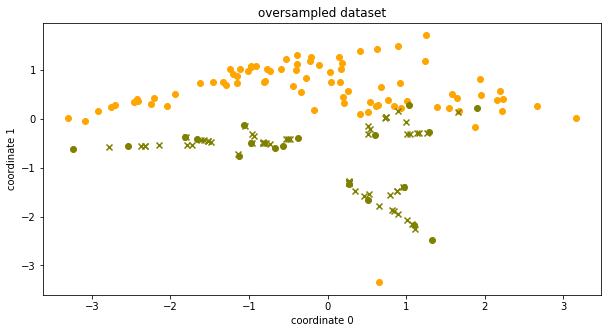

In [9]:
plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='majority class', c='orange', marker='o')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='minority class', c='olive', marker='o')
plt.scatter(X_samp[y_samp == 1][:,0], X_samp[y_samp == 1][:,1], label='new minority samples', c='olive', marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.show()

## Illustrating all oversampling techniques

In this section, we illustrate the output of all oversampling techniques with default parameters on the ```iris0``` dataset.

In [10]:
oversamplers= sv.get_all_oversamplers()

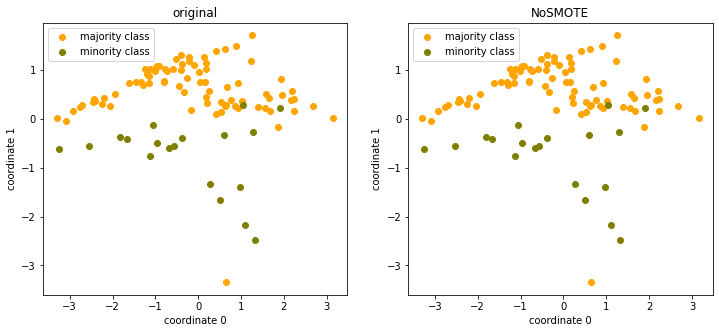

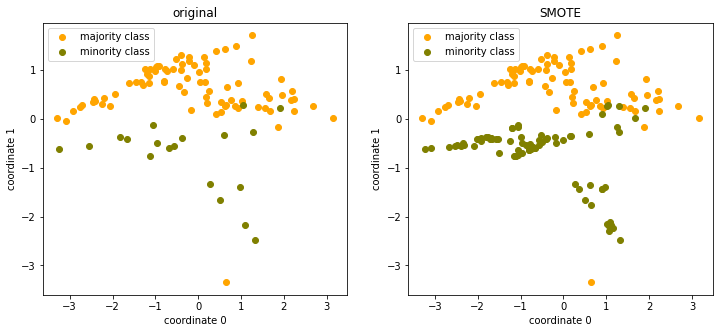

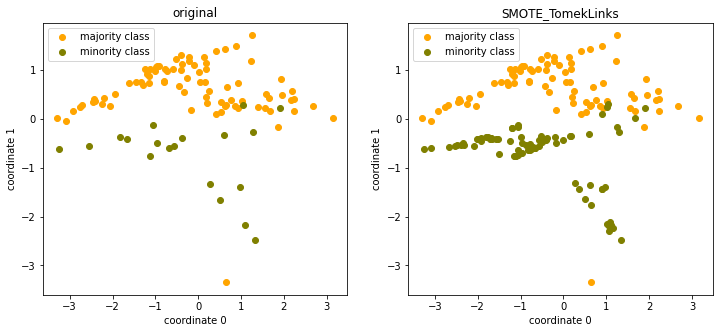

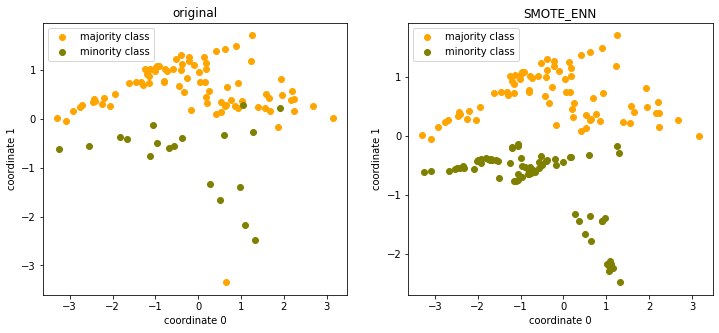

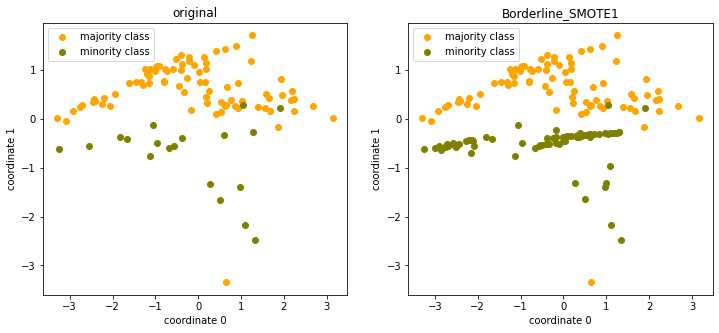

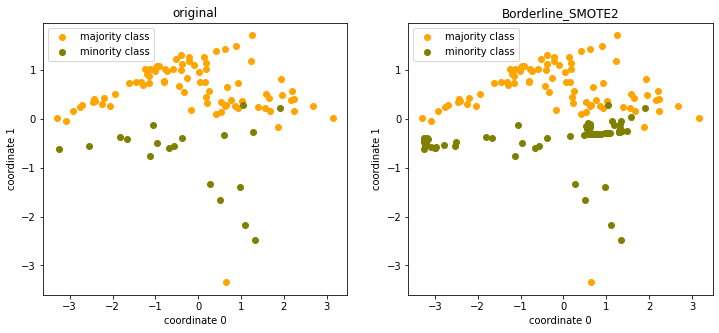

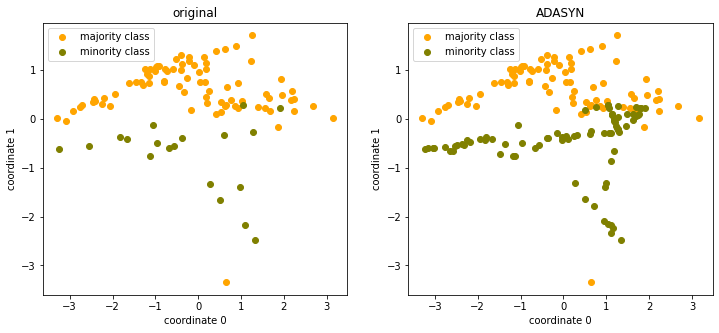

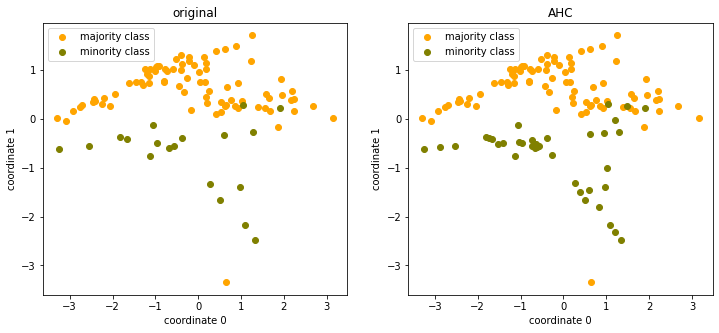

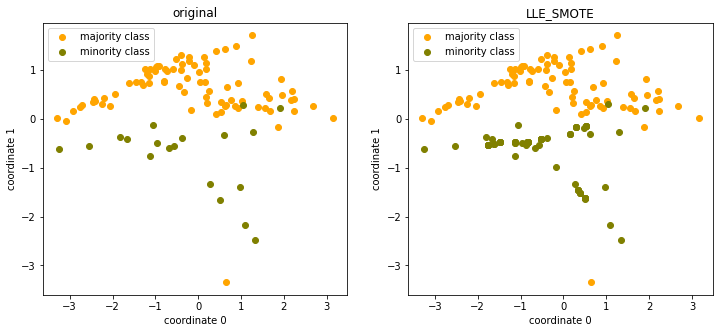

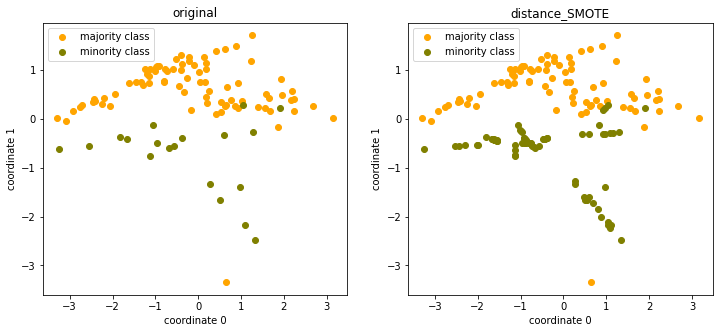

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


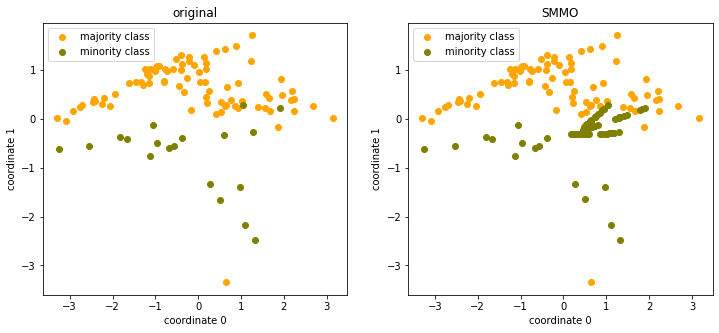

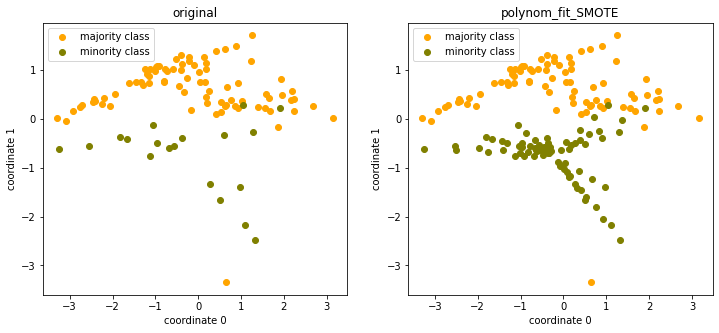

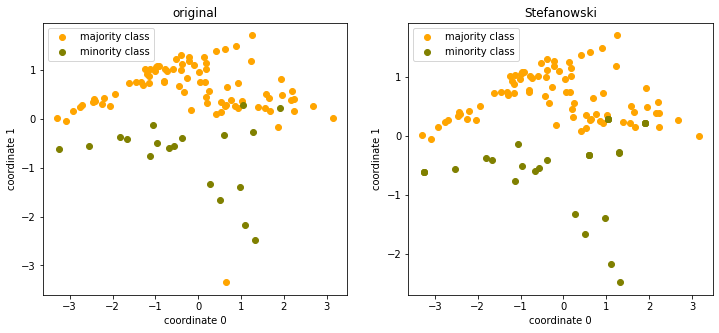

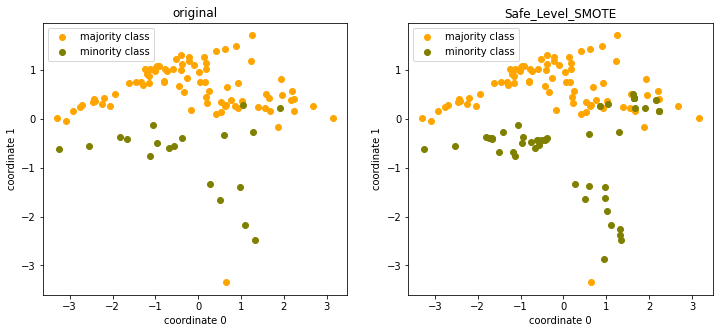

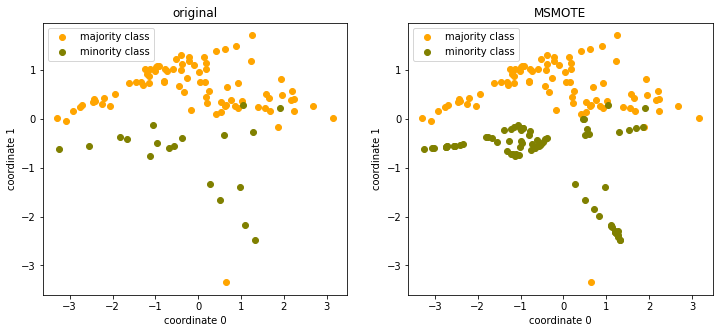

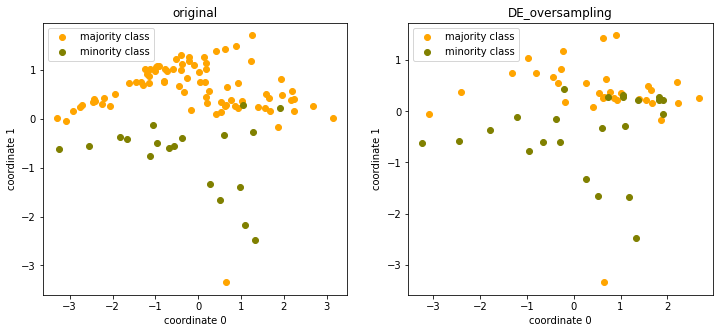

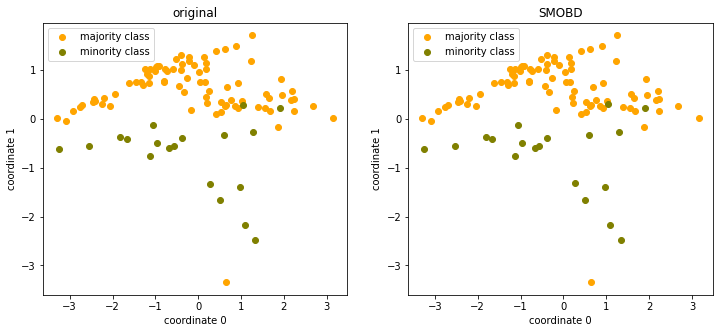

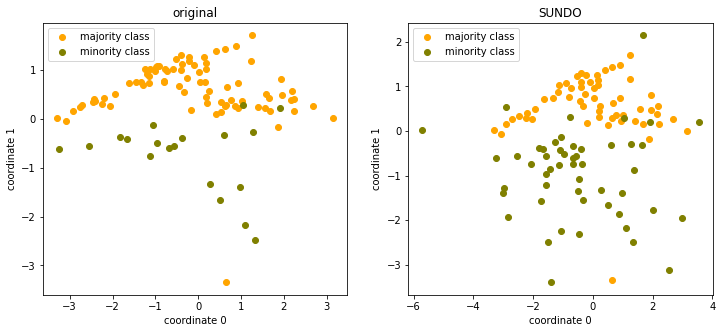

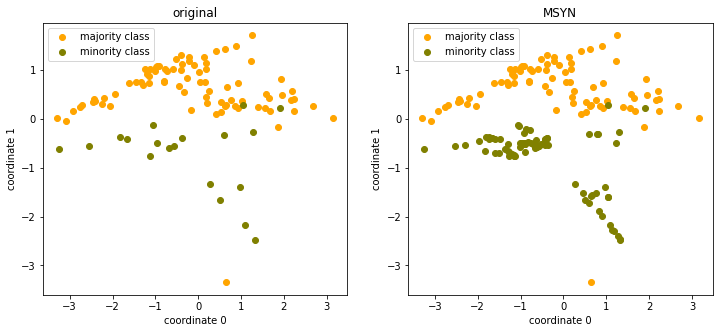

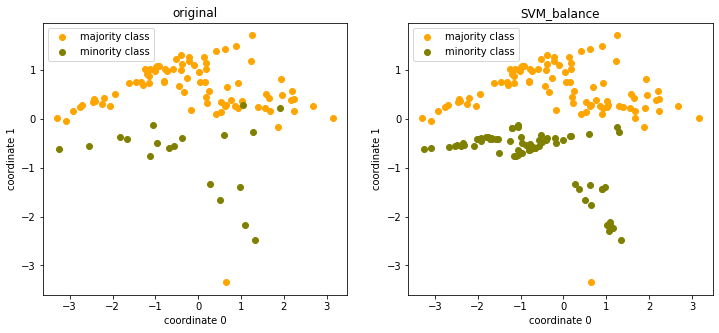

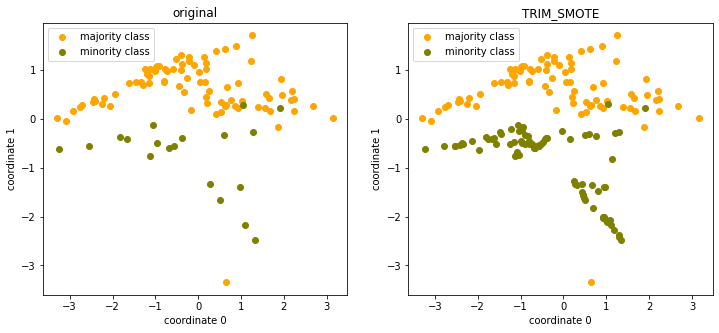

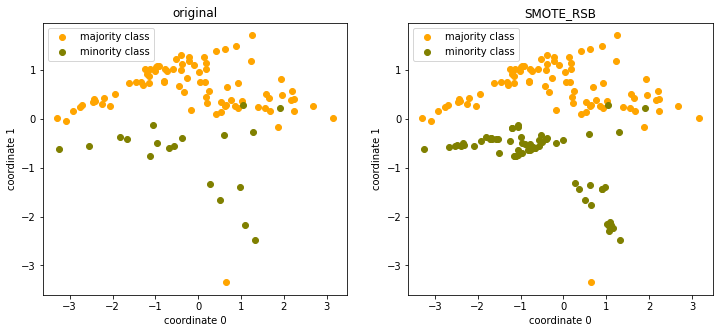

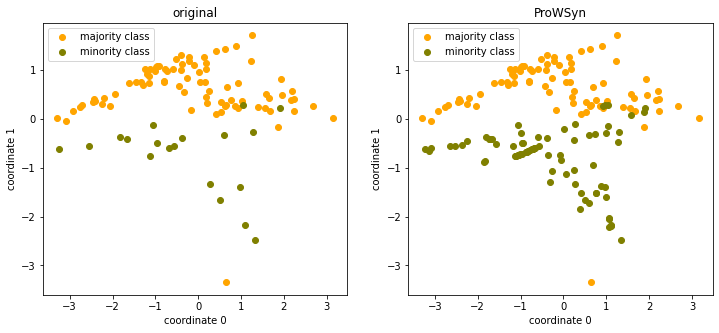

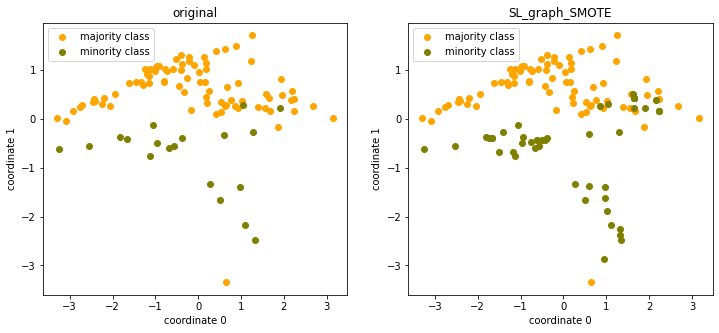

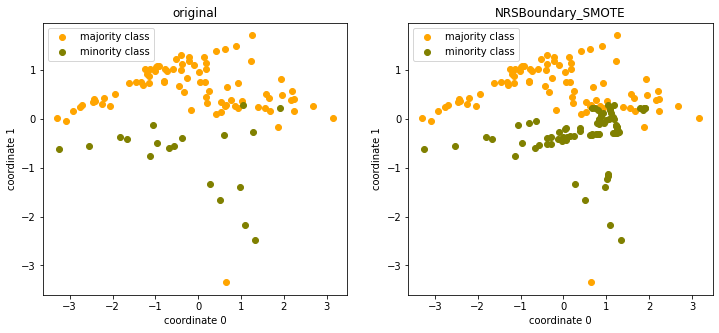

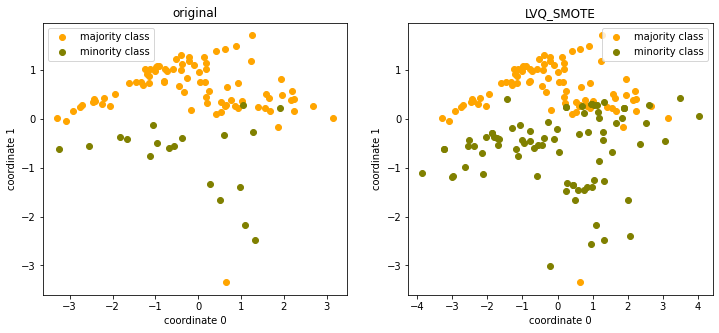

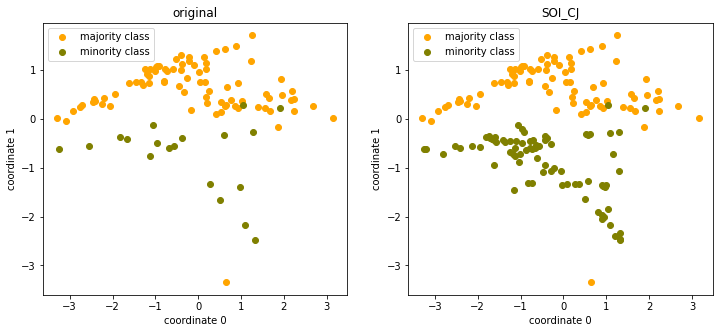

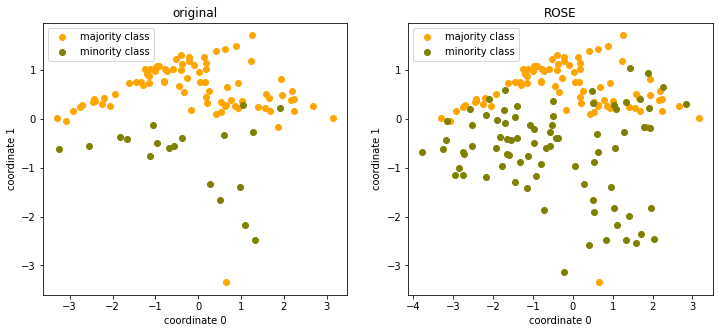

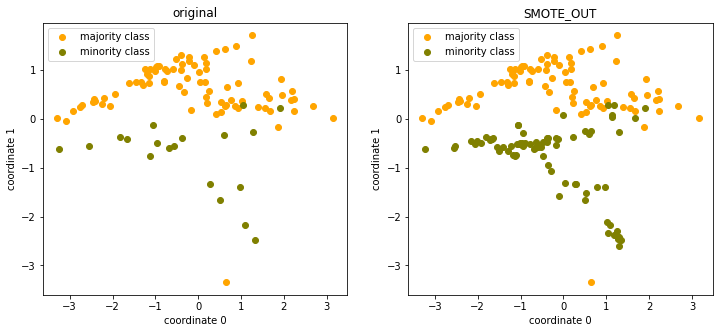

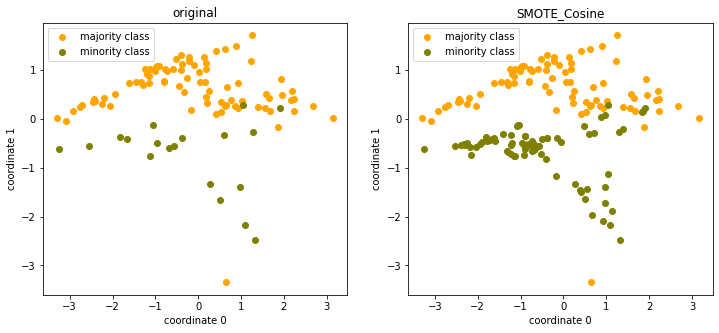

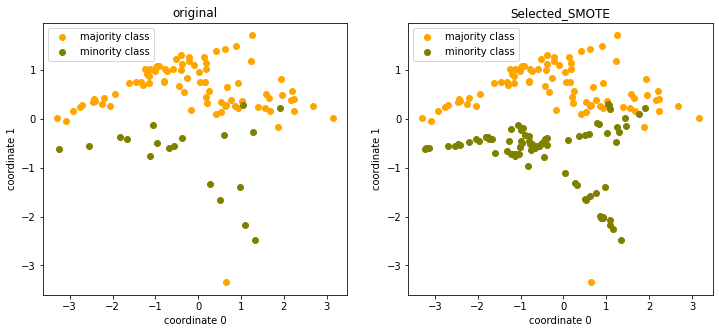

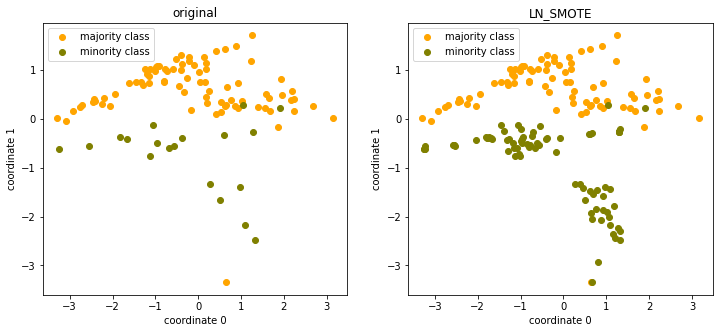

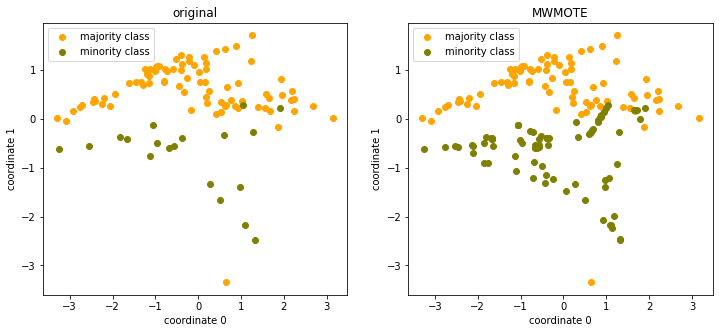

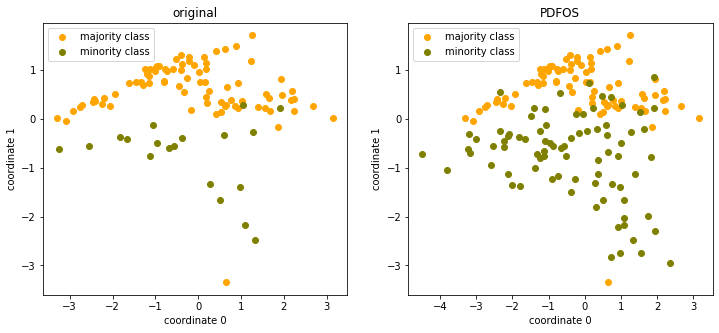

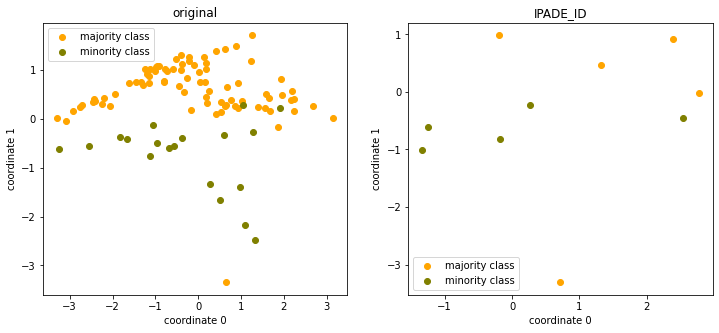

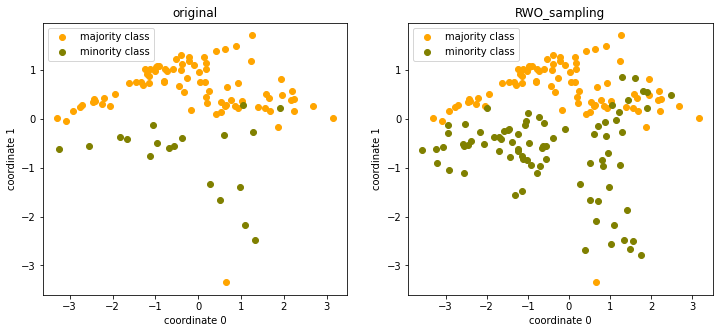

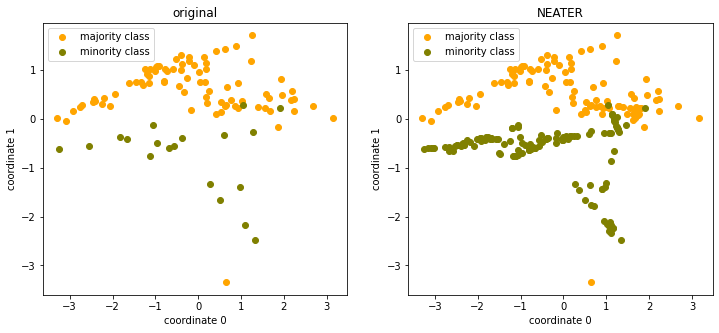

2022-07-06 21:44:03.982392: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-06 21:44:04.022140: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-06 21:44:04.022228: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-06 21:44:06.965746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild Tens


2/2 [==============================] - 0s 4ms/step


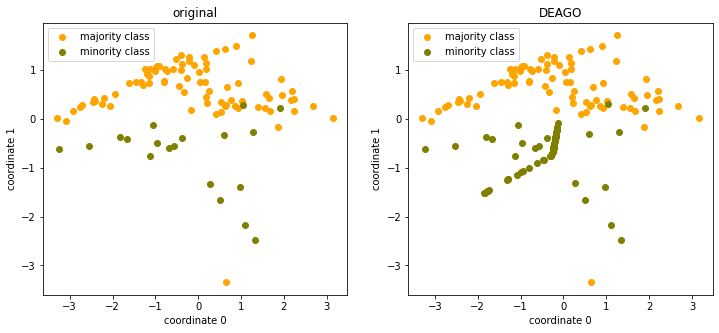

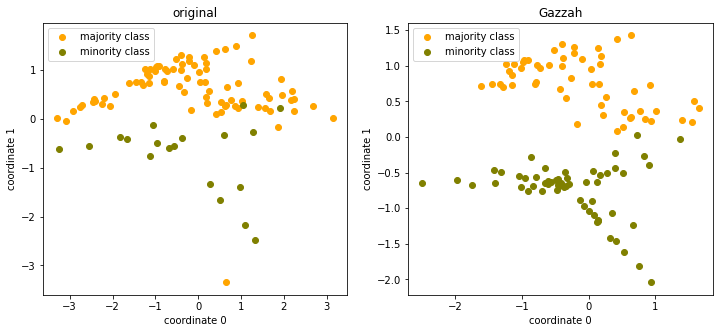

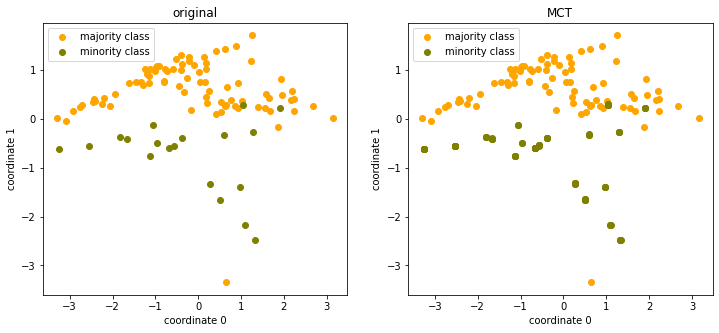

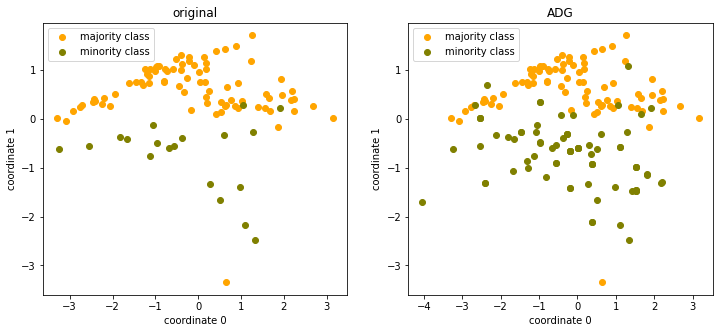

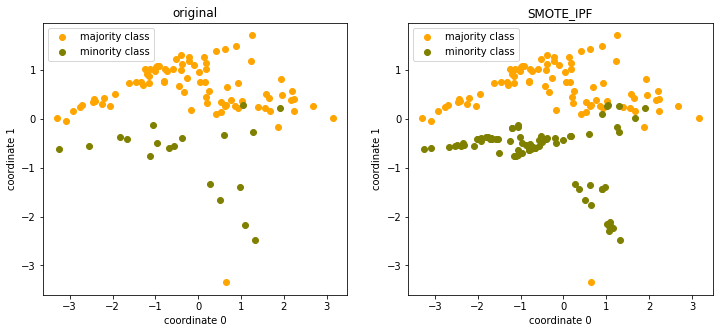

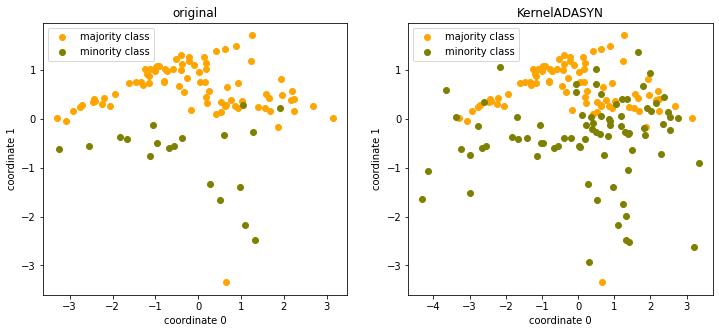

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


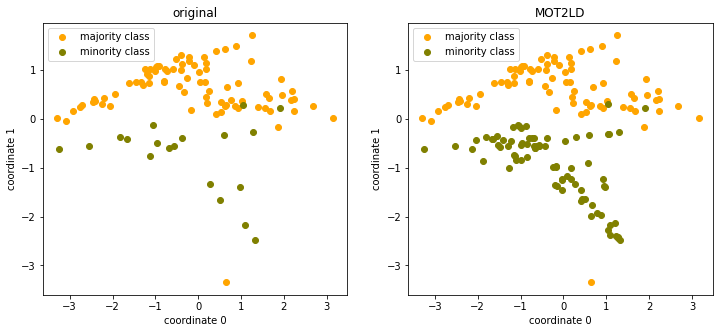

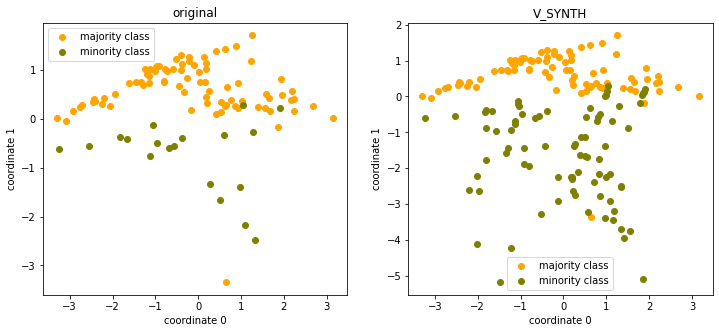

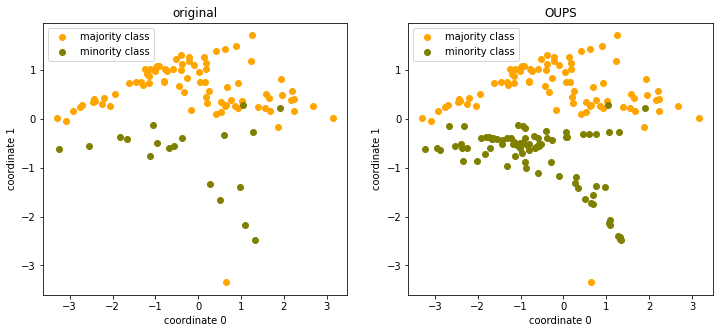

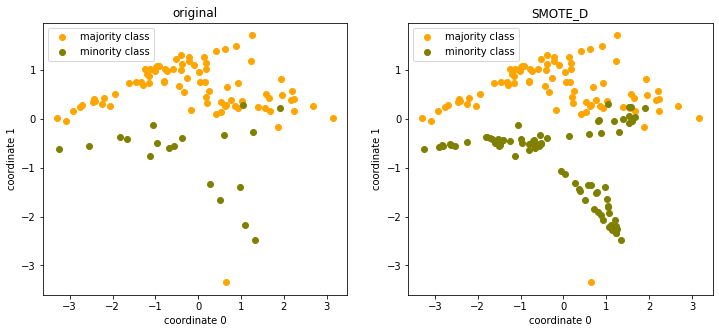

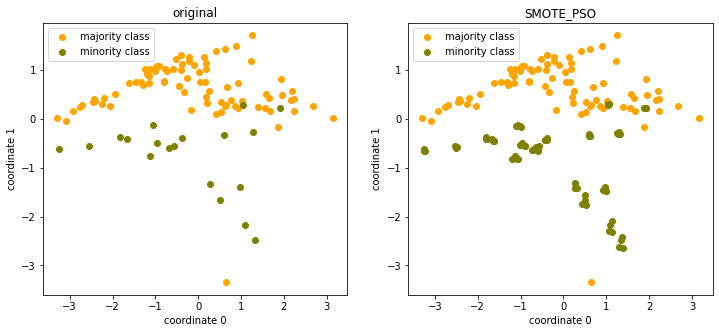

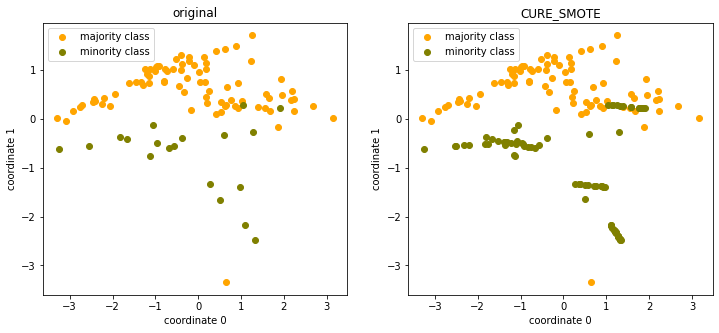

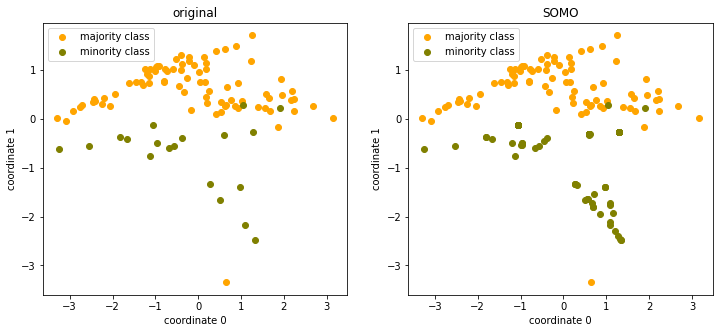

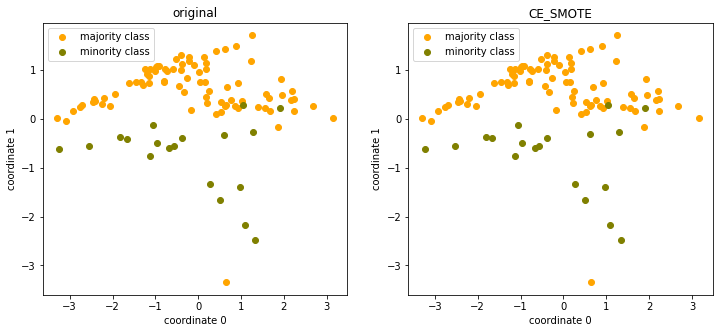

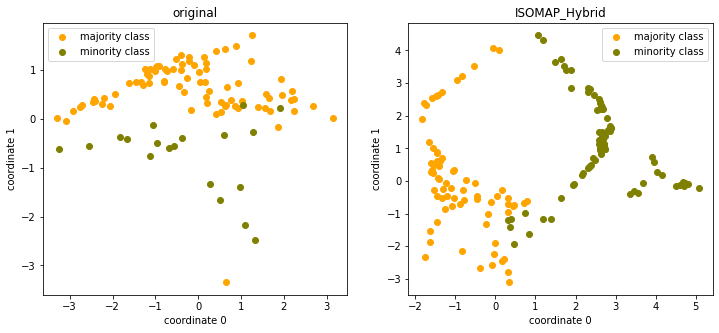

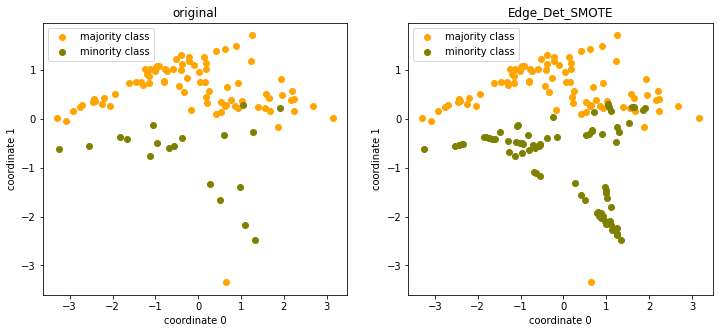

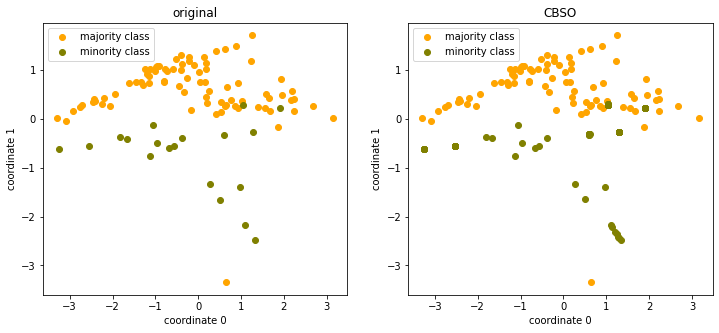

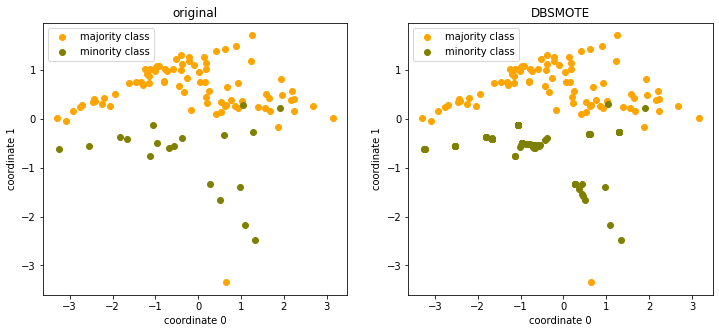

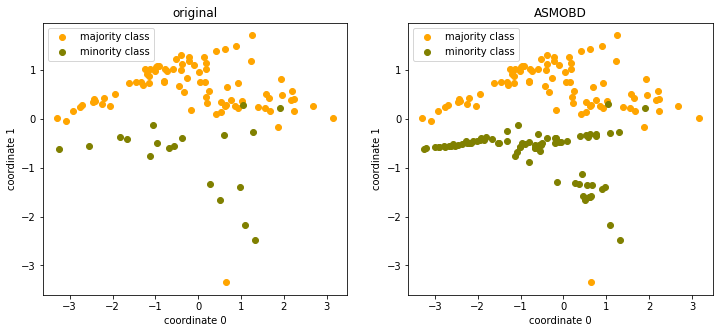

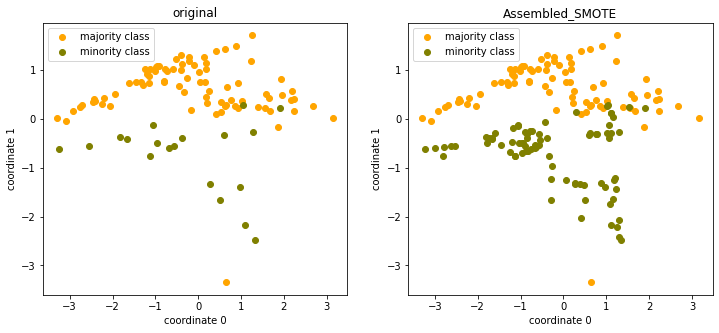

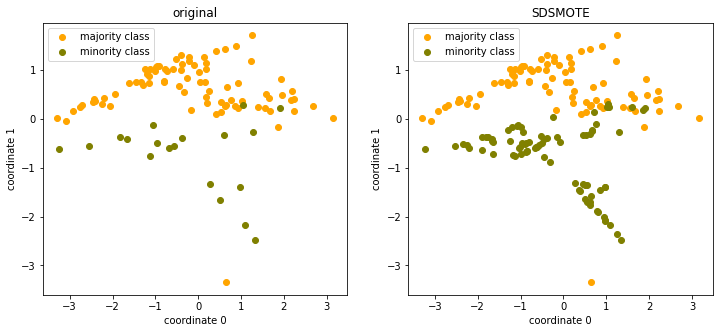

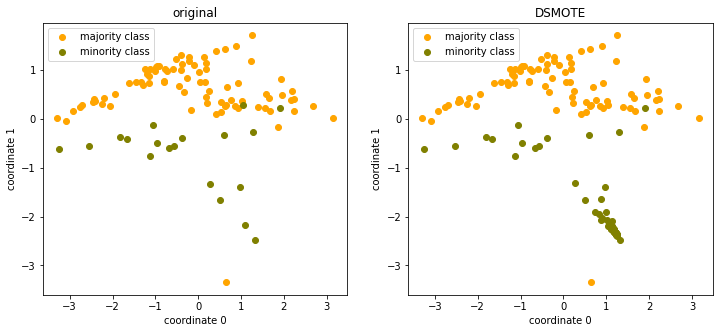

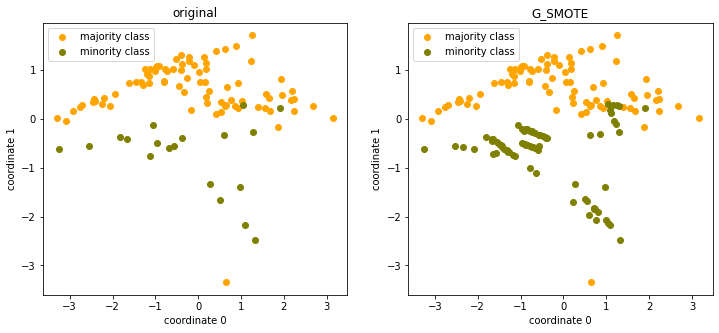

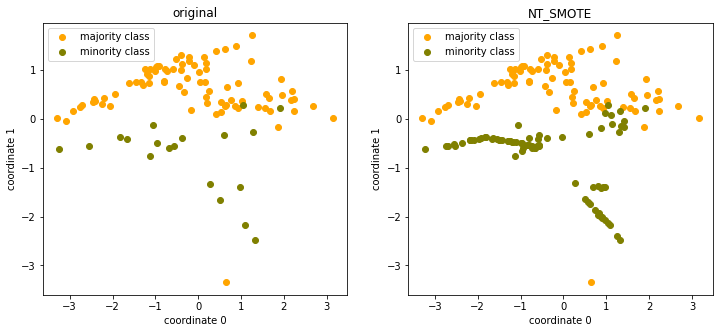

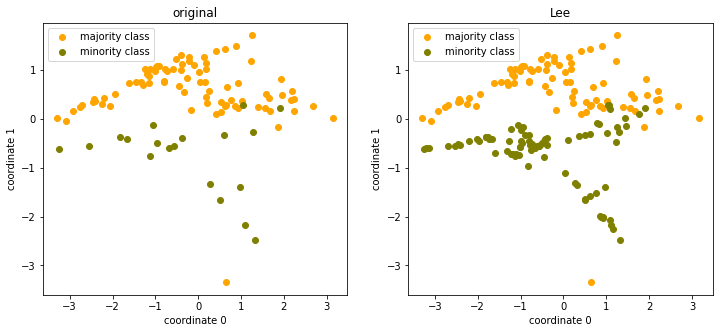

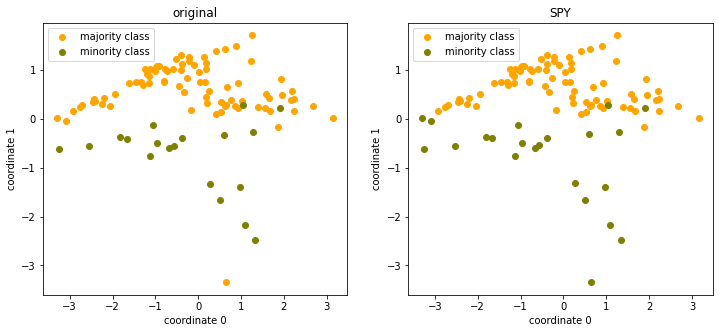

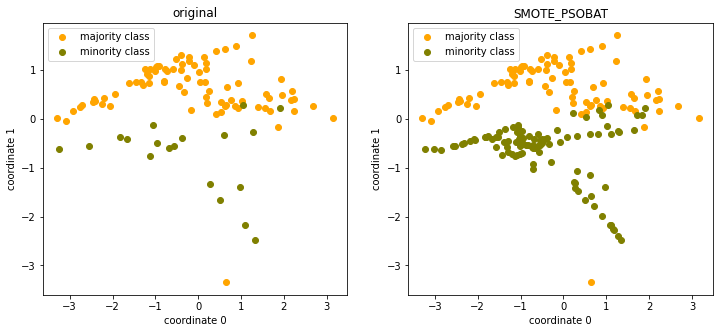

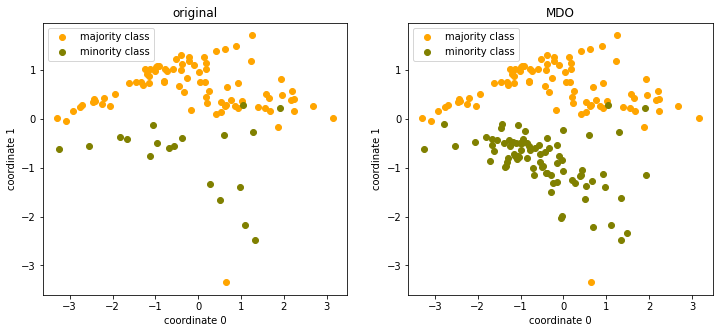

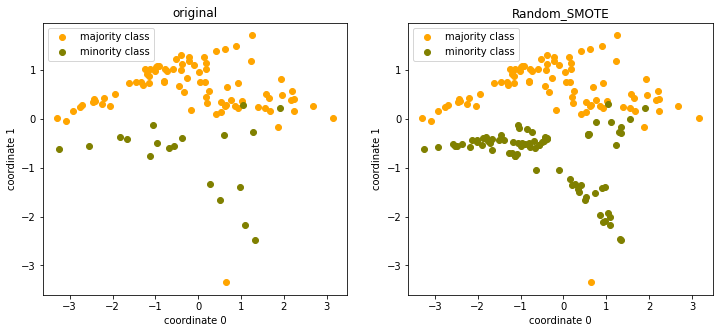

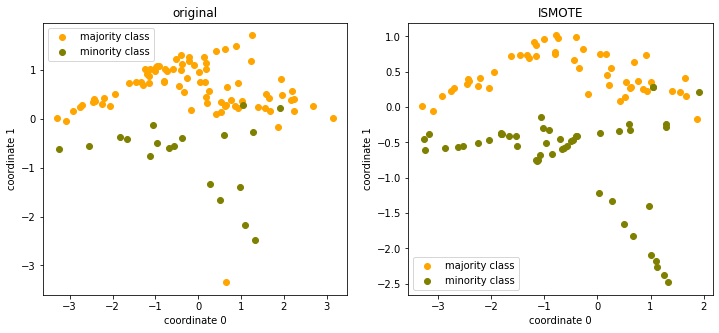

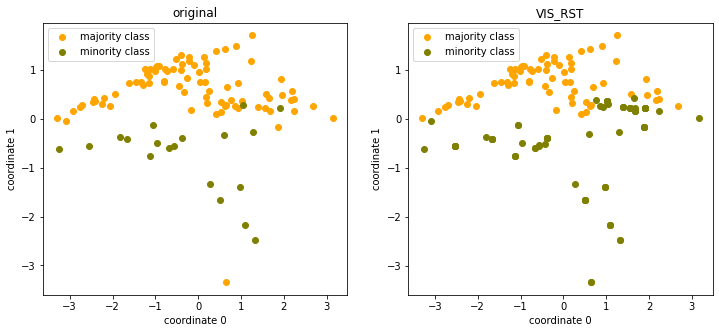

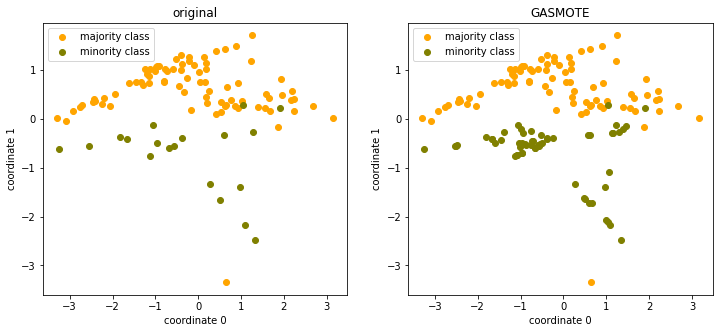

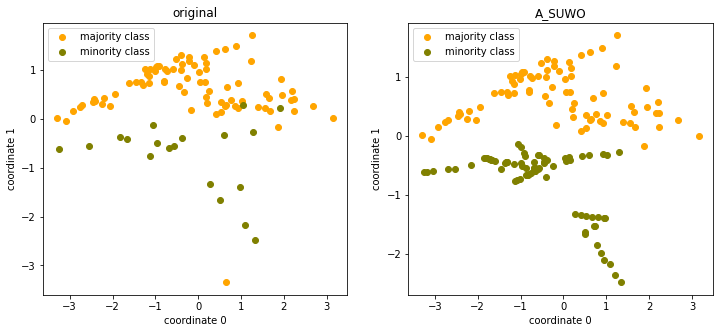

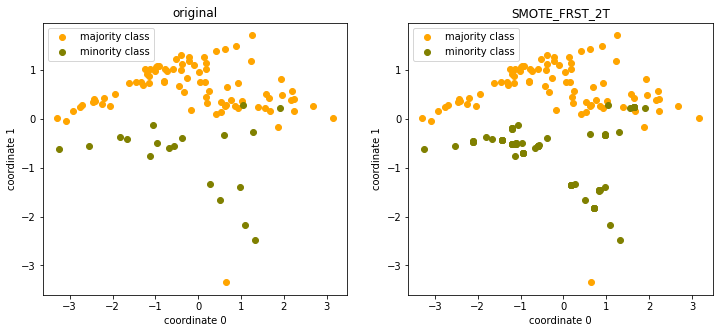

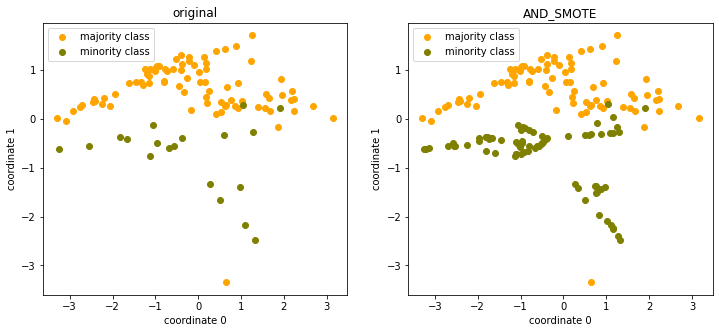

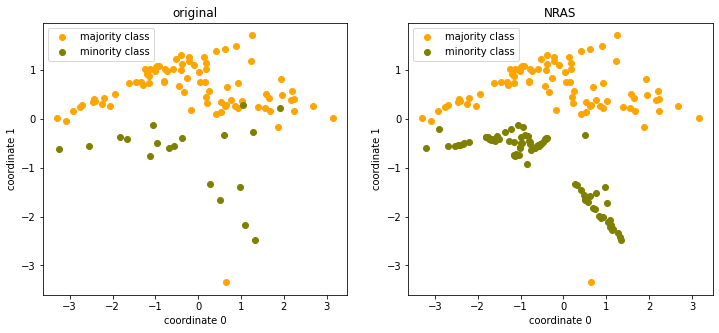

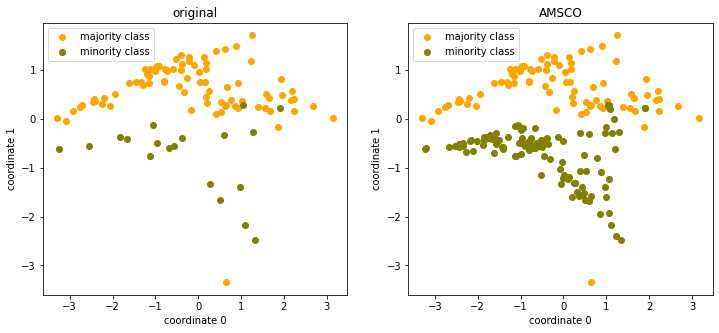

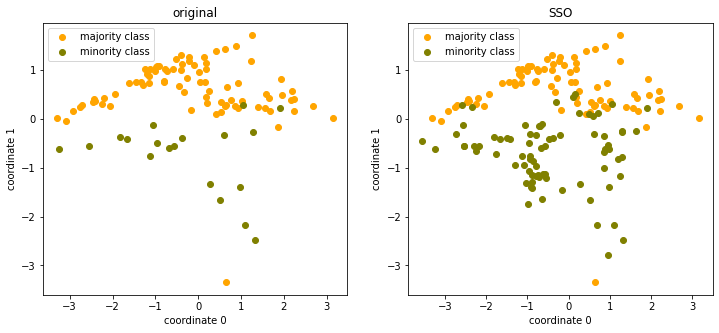

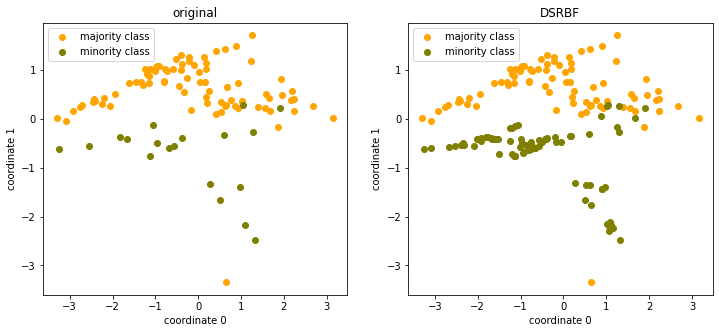

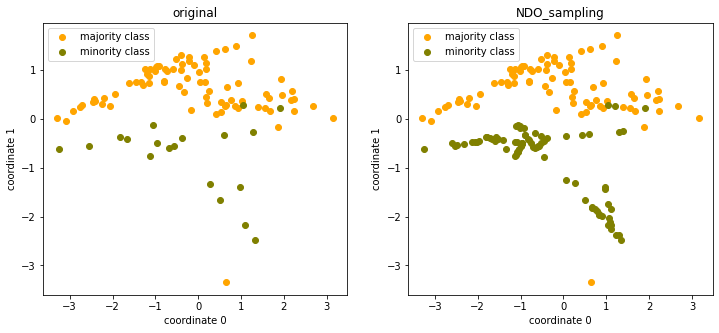

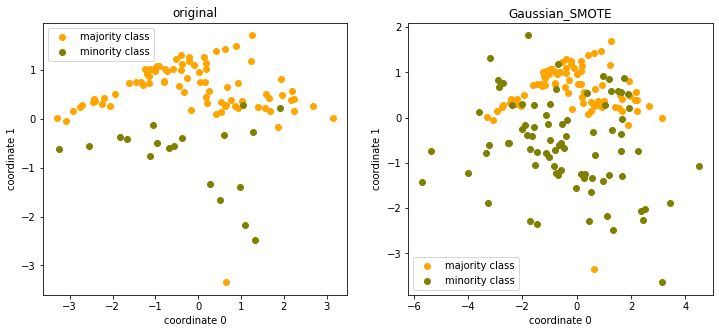

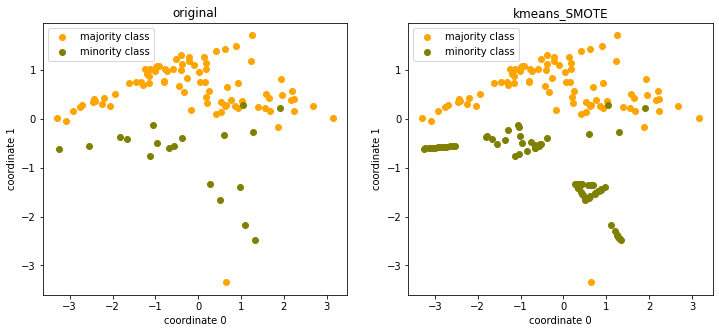

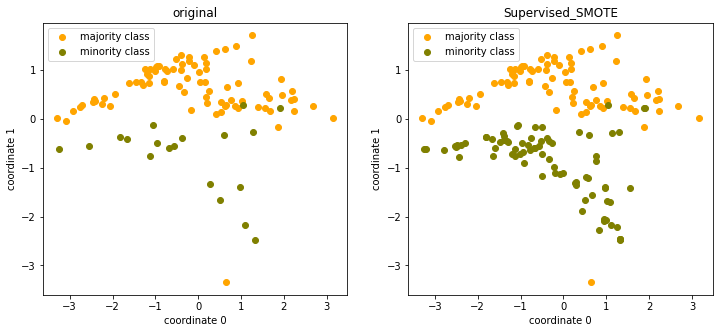

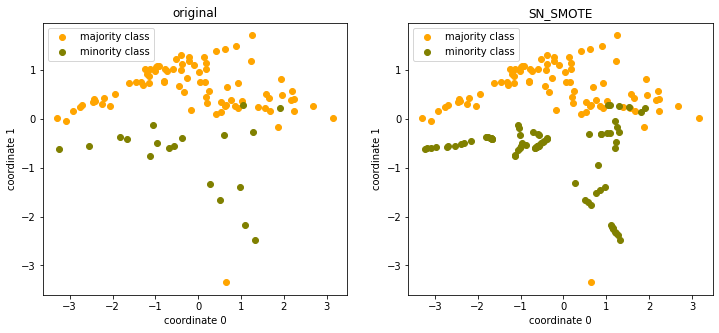

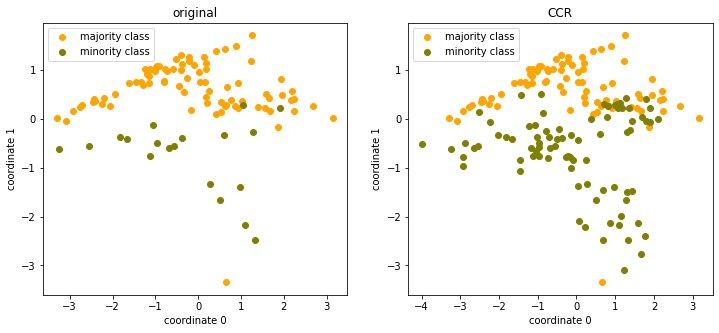

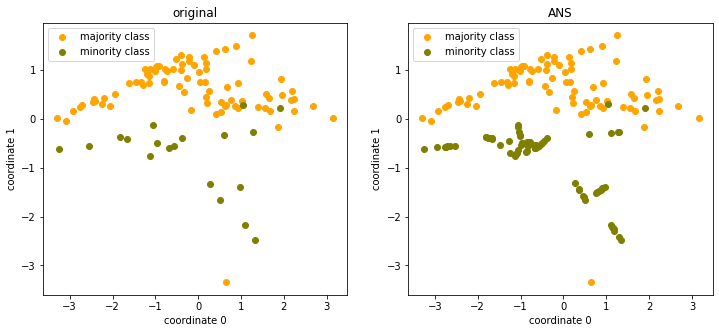

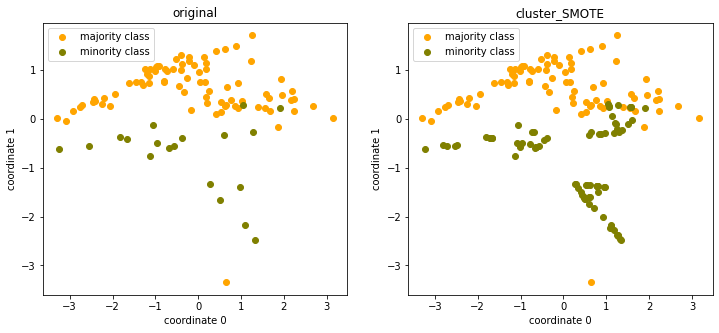

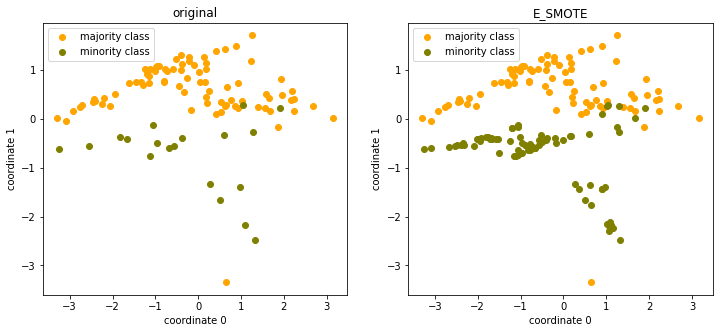

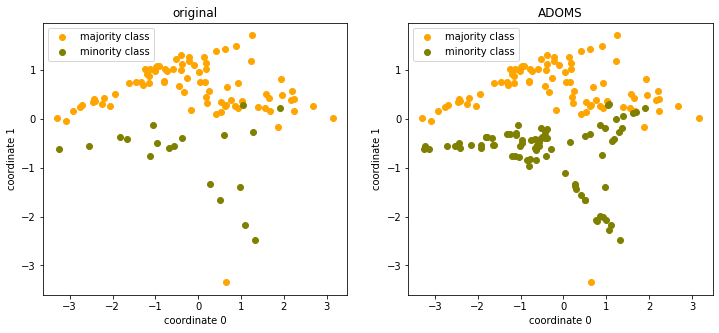

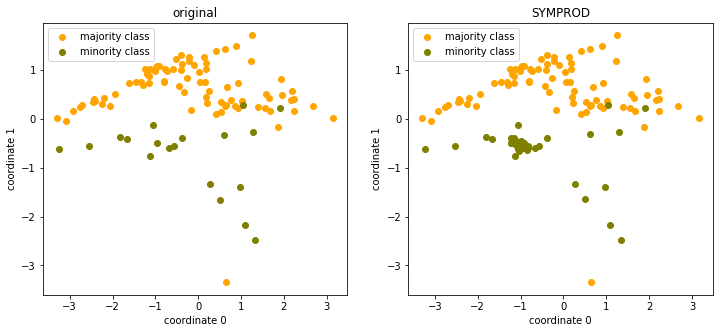

In [11]:
for o in oversamplers:
    oversampler= o(random_state=21)
    X_samp, y_samp= oversampler.sample(X, y)
    
    n_1 = np.sum(y_samp == 1)
    range_1 = np.min(X_samp[:,1]), np.max(X_samp[:,1])
    noise_10 = np.random.rand(n_1) * (range_1[1] - range_1[0])/1000
    noise_11 = np.random.rand(n_1) * (range_1[1] - range_1[0])/1000

    plt.figure(figsize=(12, 5))
    ax= plt.subplot(121)
    plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='majority class', c='orange', marker='o')
    plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='minority class', c='olive', marker='o')
    plt.title('original')
    plt.xlabel('coordinate 0')
    plt.ylabel('coordinate 1')
    plt.legend()
    
    ax= plt.subplot(122)
    plt.scatter(X_samp[y_samp == 0][:,0], X_samp[y_samp == 0][:,1], label='majority class', c='orange', marker='o')
    plt.scatter(X_samp[y_samp == 1][:,0] + noise_10, X_samp[y_samp == 1][:,1] + noise_11, label='minority class', c='olive', marker='o')
    plt.title(oversampler.__class__.__name__)
    plt.xlabel('coordinate 0')
    plt.ylabel('coordinate 1')
    plt.legend()
    plt.show()